## Data Processing

### Step 1: Import packages

In [9]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import copy

from PIL import Image

### Data Set Sizes

set|train|test|val
----|----|----|----
COVID|460|106|10
NORMAL|1341|234|8
PNEUMONIA|3875|390|8
TUBERCULOSIS|650|41|12
**TOTAL**|**6326**|**681**|**38**



### Step 2: Define working directories

In [10]:
test_data_dir = 'data/test'
train_data_dir = 'data/train'
validation_data_dir = 'data/val'

### Step 3: Define global variables

In [11]:
test_data = []
test_labels = []
train_data = []
train_labels = []
val_data = []
val_labels = []

### Step 4a: Load test data

In [81]:
for dir_name, sub_dir_list, file_list in os.walk(test_data_dir): 
    if dir_name == test_data_dir: 
        continue
    
    for file_name in file_list:
        label = os.path.basename(dir_name)
        file_path = os.path.join(dir_name, file_name)
        
        image = copy.deepcopy(Image.open(file_path))
        
        test_data.append(image) 
        test_labels.append(label)
        
        
print(f'test_data items: {len(test_data)}')
print(f'test_label items: {len(test_labels)}')

test_data items: 771
test_label items: 771


### Step 4b: Load train data

In [82]:
for dir_name, sub_dir_list, file_list in os.walk(train_data_dir): 
    if dir_name == test_data_dir: 
        continue
    
    for file_name in file_list:
        label = os.path.basename(dir_name)
        file_path = os.path.join(dir_name, file_name)
        
        image = copy.deepcopy(Image.open(file_path))
        
        train_data.append(image) 
        train_labels.append(label)
        
print(f'train_data items: {len(train_data)}')
print(f'train_label items: {len(train_labels)}')

train_data items: 6326
train_label items: 6326


### Step 4c: Load validation data

In [12]:
for dir_name, sub_dir_list, file_list in os.walk(validation_data_dir): 
    if dir_name == validation_data_dir: 
        continue
    
    for file_name in file_list:
        label = os.path.basename(dir_name)
        file_path = os.path.join(dir_name, file_name)
        
        image = copy.deepcopy(Image.open(file_path))
        
        val_data.append(image) 
        val_labels.append(label)
        
print(f'val_data items: {len(val_data)}')
print(f'val_label items: {len(val_labels)}')

val_data items: 38
val_label items: 38


#### Image details

In [84]:
img = test_data[0]
img_matrix = np.array(img) #8-bit grayscale, 0 to 255
print(img_matrix.shape)
img.show()

img_bw = img.convert("1") #binarized, True / False 
img_bw.show()

(2000, 2000)


**Plot with** `plt.imshow()`

(324, 331, 3)


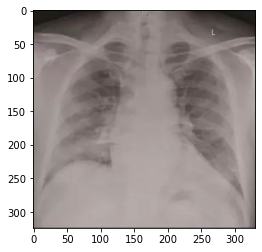

In [34]:
test_image = np.array(val_data[1])

print(test_image.shape)
plt.imshow(test_image)

In [31]:
layer1 = test_image[:,:,0:1]
layer2 = test_image[:,:,1:2]
layer3 = test_image[:,:,2:]
layers = [layer1, layer2, layer3]
for i in range(3):
    print(layers[i].shape)

(324, 331, 1)
(324, 331, 1)
(324, 331, 1)


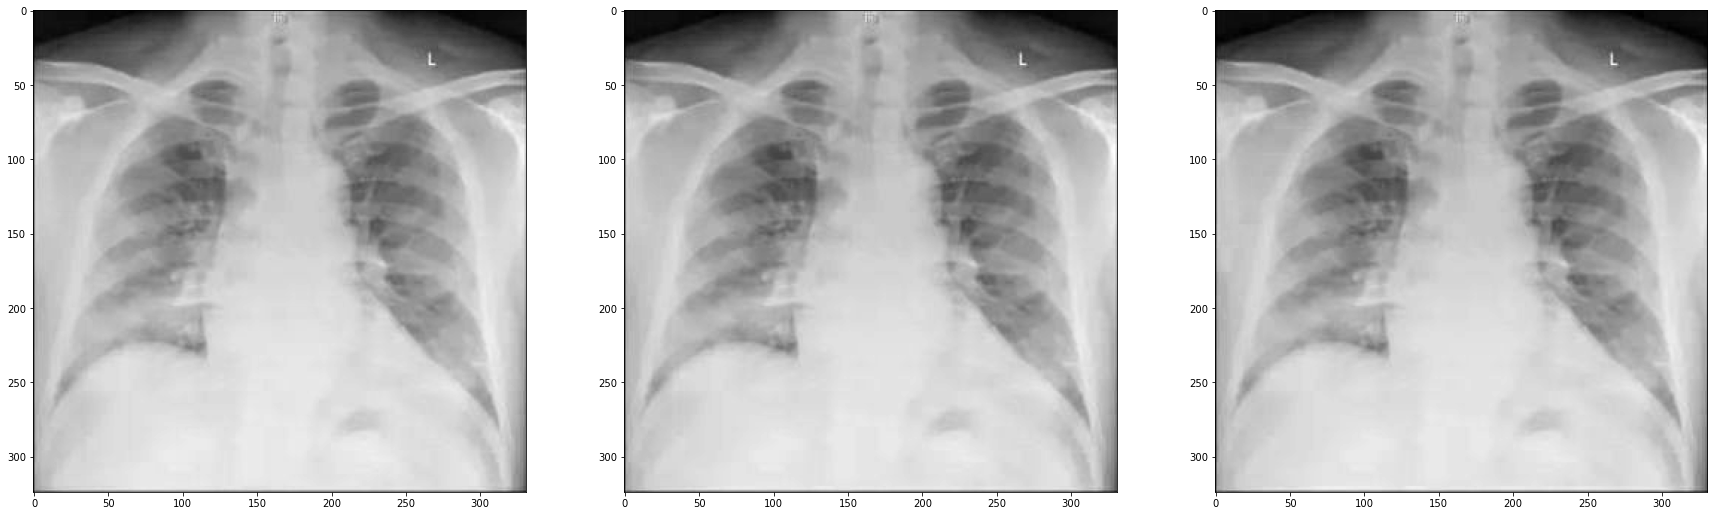

In [32]:
fig, ax = plt.subplots(1,3,figsize = (30,10))
for i in range(3):
    ax[i].imshow(layers[i], cmap = 'gray')

^ This result probably suggests that we can take the average of the layers when we come across a 3D matrix.

array([[ 22.33333333,  27.33333333,  30.33333333, ...,  28.66666667,
         28.66666667,  28.66666667],
       [ 22.33333333,  27.33333333,  30.33333333, ...,  28.66666667,
         28.66666667,  28.66666667],
       [ 22.33333333,  27.33333333,  30.33333333, ...,  28.66666667,
         28.66666667,  28.66666667],
       ...,
       [ 57.66666667, 127.66666667, 129.        , ...,  98.        ,
         87.        ,  76.        ],
       [ 62.66666667, 127.66666667, 125.        , ...,  99.        ,
         89.        ,  80.        ],
       [ 29.66666667,  88.66666667,  80.        , ...,  57.        ,
         48.        ,  41.        ]])

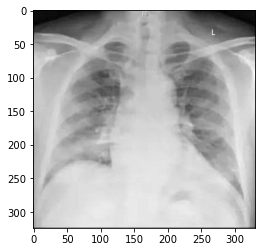

In [33]:
average = test_image.mean(axis = 2)
plt.imshow(average, cmap = 'gray')
average

**Binary Representation**

Now try by using convert('1') method and send to array.

In [37]:
test_img = val_data[1] #same data point as above
img_bw = np.array(test_img.convert("1"), dtype = 'int')
img_bw

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

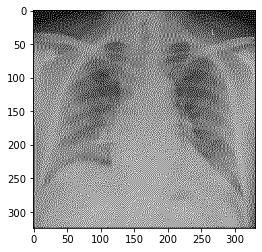

In [28]:
plt.imshow(img_bw, cmap = 'gray')